In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

# 팀과제

- feature: pclass, sex, fare
- label: survived

1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.
5. 클래스로 묶은 다음에 성별에 따른 생존율
6. pclass 별 평균 fare
7. 요금별 상위 10%과 하위 10%의 생존율 그래프로 비교
8. 선착장별 who별 평균 생존율 구하기

### 문제1) 1등급, female, 32달러 인경우 생사유무를 예측하시요

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
x_data = titanic[['pclass', 'sex', 'fare']]
y_data = titanic['survived']

x_data = pd.get_dummies(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                 test_size=0.2, stratify=y_data, random_state=1)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train, y_train)

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7851123595505618
0.8044692737430168


In [ ]:
# 1,32,'여성'

In [4]:
model.predict([[1,32,1,0]])

array([1], dtype=int64)

In [5]:
model.predict_proba([[1,32,1,0]])

array([[0.08937225, 0.91062775]])

### 문제2) train, test, f1 score 를 구하시요

In [6]:
y_pred = model.predict(x_data)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f1_score(y_data, y_pred))
print(f1_score(y_train, y_train_pred))
print(f1_score(y_test, y_test_pred))

0.7142857142857143
0.7074569789674952
0.7407407407407408


### 문제3) confusion matrix 를 구하고 heatmap 을 그리시요.

In [7]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

[[94 16]
 [19 50]]


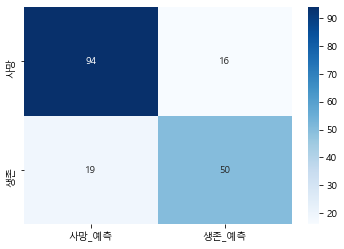

In [8]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', yticklabels=['사망', '생존'], 
           xticklabels=['사망_예측', '생존_예측'])
plt.show()

### 문제4) roc curve 를 그리시요

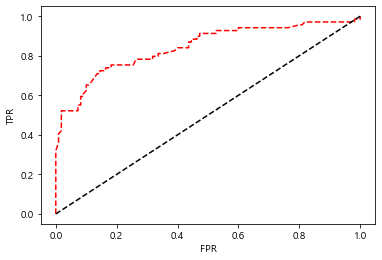

In [9]:
p = model.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, p)

plt.plot( fpr, tpr, 'r--')
plt.plot( [0,1],[0,1], 'k--')
plt.xlabel( 'FPR')
plt.ylabel('TPR')
plt.show()

### 문제5) 성별로 묶은 다음에 클래스에 따른 생존율

In [10]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
df = titanic[['pclass', 'sex', 'survived']]
df

,pclass,sex,survived
0,3,male,0
1,1,female,1
2,3,female,1
3,1,female,1
4,3,male,0
...,...,...,...
886,2,male,0
887,1,female,1
888,3,female,0
889,1,male,1


               survived
pclass sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='survived'>

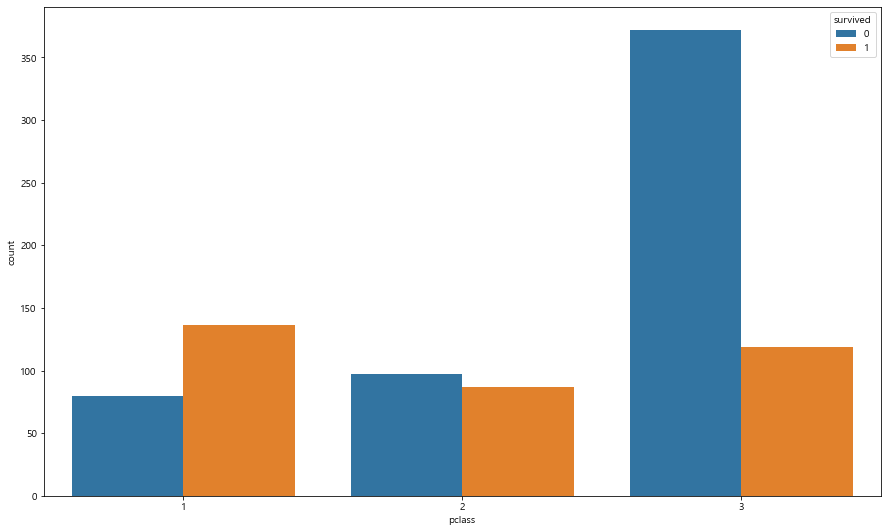

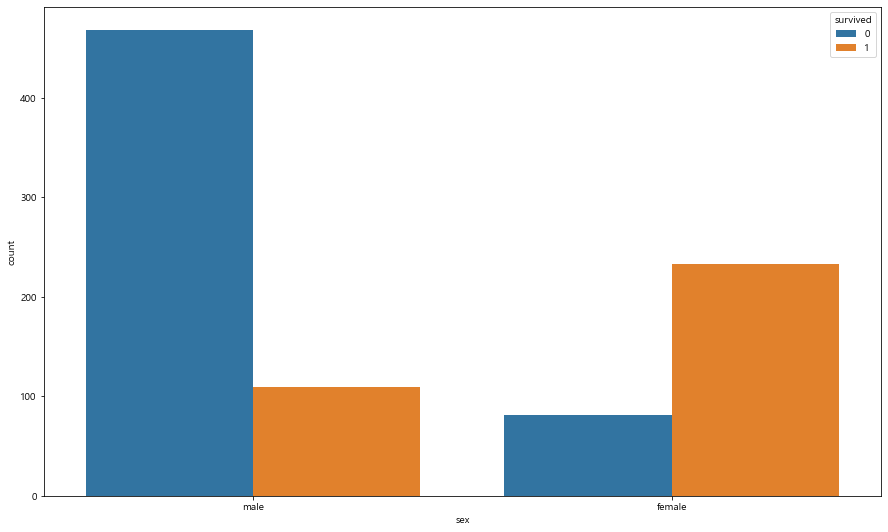

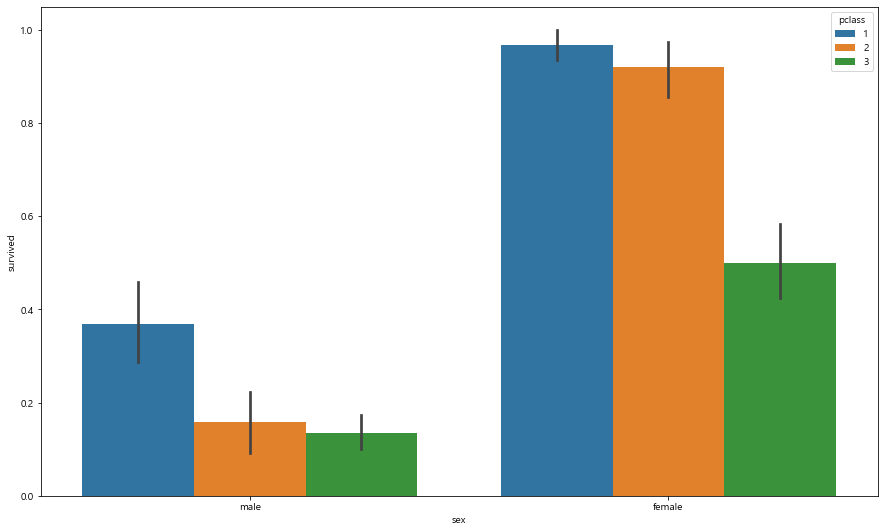

In [12]:
df_pclass = df.groupby(['pclass','sex']).mean()
print(df_pclass)

plt.figure(figsize = (15,9))
sns.countplot(df['pclass'],hue=df['survived'])

plt.figure(figsize = (15,9))
sns.countplot(df['sex'],hue=df['survived'])

# 성별로 묶은 후 pclass별 생존율
plt.figure(figsize = (15,9))
sns.barplot(x = 'sex', y = 'survived', hue = 'pclass', data = df)

### 문제6) pclass 별 평균 fare

,fare
pclass,
1,84.154687
2,20.662183
3,13.675550


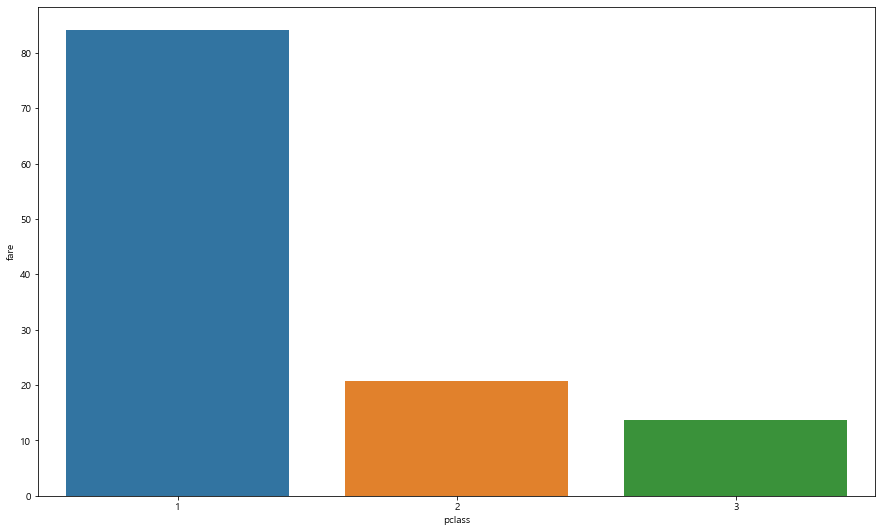

In [16]:
df = titanic[['pclass', 'sex', 'fare', 'survived']]
# pclass별 평균 fare
df_pclass = df.groupby('pclass')[['fare']].mean()
display(df_pclass)

# 그래프
plt.figure(figsize=(15,9))
sns.barplot(x = df_pclass.index, y = df_pclass['fare'])
plt.show()

### 문제7) 요금별 상위 10%과 하위 10%의 생존율 비교

7.55
77.9583


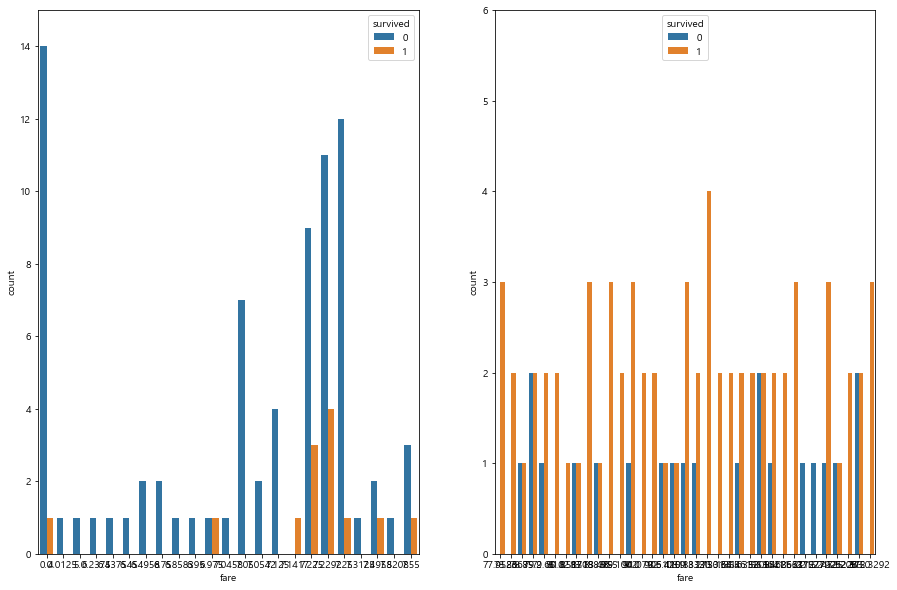

In [17]:
# 필요한 컬럼 추출
data = titanic[['survived', 'fare', 'sex', 'who']]
# 결측치 확인
data.isna().sum()

# 하위 25% 값
print(data['fare'].quantile(q=0.1))
# 상위 25% 값
print(data['fare'].quantile(q=0.9))

low_data = data.query('fare <= 7.55')
high_data = data.query('fare >= 77.9583')


plt.figure(figsize=(15,10))
plt.subplot(121)
sns.countplot(x = 'fare', data=low_data, hue = 'survived')
plt.ylim(0,15)


plt.subplot(122)
sns.countplot(x = 'fare', data=high_data, hue = 'survived')
plt.ylim(0,6)
plt.show()

### 문제8) 선착장별 who별 평균 생존율 구하기

In [18]:
# 필요한 컬럼 추출
data = titanic[['survived', 'embarked', 'who']]

# 결측치 확인
print(data.isna().sum())

# 결측치는 가장 많이 나온 값으로 대체 
data['embarked'].value_counts()

# 결측치 S로 대체함
data['embarked'].fillna('S',inplace=True)

# 결측치 재확인
print(data.isna().sum())


#선착장별 who별 평균 생존율
data = data.groupby(['embarked', 'who'])['survived'].mean()

emb_who_mean = pd.DataFrame(data)
emb_who_mean

survived    0
embarked    2
who         0
dtype: int64
survived    0
embarked    0
who         0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


survived
embarked who            
C        child  0.777778
         man    0.288889
         woman  0.883333
Q        child  0.200000
         man    0.081081
         woman  0.742857
S        child  0.566667
         man    0.143902
         woman  0.715909